# Cleaning US Census Data

**This project is part of the nanodegree course "Data Science" offered by Codecademy (www.codecademy.com)**

You just got hired as a Data Analyst at the Census Bureau, which collects census data and creates interesting visualizations and insights from it.

The person who had your job before you left you all the data they had for the most recent census. It is in multiple csv files. They didn’t use pandas, they would just look through these csv files manually whenever they wanted to find something. Sometimes they would copy and paste certain numbers into Excel to make charts.

The thought of it makes you shiver. This is not scalable or repeatable.

Your boss wants you to make some scatterplots and histograms by the end of the day. Can you get this data into pandas and into reasonable shape so that you can make these histograms?

## Inspect the Data!

The first visualization your boss wants you to make is a scatterplot that shows average income in a state vs proportion of women in that state.

Open some of the census csv files in the navigator (click the file icon in the top left corner of the code editor and then click on any of the csv files to open them). How are they named? What kind of information do they hold? Will they help us make this graph?

It will be easier to inspect this data once we have it in a DataFrame. You can’t even call .head() on these csvs! How are you supposed to read them?

Using glob, loop through the census files available and load them into DataFrames. Then, concatenate all of those DataFrames together into one DataFrame, called something like us_census.

In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import glob

states = glob.glob("states*.csv")

df_list = []
for state in states:
  data = pd.read_csv(state)
  df_list.append(data)

us_census = pd.concat(df_list)
print(us_census.head())

   Unnamed: 0           State  TotalPop             Hispanic  \
0           0    Rhode Island   1053661  13.356666666666700%   
1           1  South Carolina   4777576   5.056684981684990%   
2           2    South Dakota    843190  3.2396396396396400%   
3           3       Tennessee   6499615   4.720026972353340%   
4           4           Texas  26538614   38.04673809068300%   

                 White                Black                Native  \
0   74.32541666666670%    5.68291666666667%   0.3462500000000000%   
1  62.888736263736200%   28.75091575091580%   0.2923992673992670%   
2   82.50090090090090%  1.4238738738738800%    9.417567567567570%   
3   73.49008766014819%  18.283816587997300%  0.22663519892110600%   
4  44.687908934379100%   11.65004782858240%  0.26114405969007100%   

                 Asian                Pacific     Income            GenderPop  
0  3.2475000000000000%  0.035833333333333300%  $59125.27      510388M_543273F  
1   1.249175824175820%  0.04697802197802

Look at the .columns and the .dtypes of the us_census DataFrame. Are those datatypes going to hinder you as you try to make histograms?

In [35]:
print(us_census.columns)
print(us_census.dtypes)

Index(['Unnamed: 0', 'State', 'TotalPop', 'Hispanic', 'White', 'Black',
       'Native', 'Asian', 'Pacific', 'Income', 'GenderPop'],
      dtype='object')
Unnamed: 0     int64
State         object
TotalPop       int64
Hispanic      object
White         object
Black         object
Native        object
Asian         object
Pacific       object
Income        object
GenderPop     object
dtype: object


## Regex to the Rescue

Use regex to turn the Income column into a format that is ready for conversion into a numerical type.

In [36]:
#Removing '$' from the Income column:
us_census.Income = us_census['Income'].replace('[\$,]' , '', regex = True)

#Turning the Income column to numeric type:
us_census.Income = pd.to_numeric(us_census.Income)

print(us_census.head())
print(us_census.dtypes)

   Unnamed: 0           State  TotalPop             Hispanic  \
0           0    Rhode Island   1053661  13.356666666666700%   
1           1  South Carolina   4777576   5.056684981684990%   
2           2    South Dakota    843190  3.2396396396396400%   
3           3       Tennessee   6499615   4.720026972353340%   
4           4           Texas  26538614   38.04673809068300%   

                 White                Black                Native  \
0   74.32541666666670%    5.68291666666667%   0.3462500000000000%   
1  62.888736263736200%   28.75091575091580%   0.2923992673992670%   
2   82.50090090090090%  1.4238738738738800%    9.417567567567570%   
3   73.49008766014819%  18.283816587997300%  0.22663519892110600%   
4  44.687908934379100%   11.65004782858240%  0.26114405969007100%   

                 Asian                Pacific    Income            GenderPop  
0  3.2475000000000000%  0.035833333333333300%  59125.27      510388M_543273F  
1   1.249175824175820%  0.0469780219780220

Now look at the GenderPop column. We are going to want to separate this into two columns, the Men column, and the Women column.

Split the column into those two new columns using str.split and separating out those results. Then, convert both of the columns into numerical datatypes.

There is still an M or an F character in each entry! We should remove those before we convert.

In [37]:
genders = us_census.GenderPop.str.split("_")

us_census["MenPop"] = pd.to_numeric(genders.str.get(0).str[:-1])
us_census["WomenPop"] = pd.to_numeric(genders.str.get(1).str[:-1])

print(us_census.head())
print(us_census.dtypes)

   Unnamed: 0           State  TotalPop             Hispanic  \
0           0    Rhode Island   1053661  13.356666666666700%   
1           1  South Carolina   4777576   5.056684981684990%   
2           2    South Dakota    843190  3.2396396396396400%   
3           3       Tennessee   6499615   4.720026972353340%   
4           4           Texas  26538614   38.04673809068300%   

                 White                Black                Native  \
0   74.32541666666670%    5.68291666666667%   0.3462500000000000%   
1  62.888736263736200%   28.75091575091580%   0.2923992673992670%   
2   82.50090090090090%  1.4238738738738800%    9.417567567567570%   
3   73.49008766014819%  18.283816587997300%  0.22663519892110600%   
4  44.687908934379100%   11.65004782858240%  0.26114405969007100%   

                 Asian                Pacific    Income            GenderPop  \
0  3.2475000000000000%  0.035833333333333300%  59125.27      510388M_543273F   
1   1.249175824175820%  0.04697802197802

These monstrous csv files probably have nan values in them! Print out your column with the number of women per state to see.

We can fill in those nans by using pandas’ .fillna() function.

You have the TotalPop per state, and you have the Men per state. As an estimate for the nan values in the Women column, you could use the TotalPop of that state minus the Men for that state.

Print out the Women column after filling the nan values to see if it worked!

In [38]:
us_census = us_census.fillna(value = {"WomenPop": us_census.TotalPop - us_census.MenPop})

#print(us_census.head())
print(us_census[["State", "WomenPop"]])

                  State    WomenPop
0          Rhode Island    543273.0
1        South Carolina   2455167.0
2          South Dakota    419713.0
3             Tennessee   3331859.0
4                 Texas  13367298.0
5                  Utah   1444150.0
0                  Utah   1444150.0
1               Vermont    318031.0
2              Virginia   4195682.0
3            Washington   3497739.0
4         West Virginia    937789.0
5             Wisconsin   2890732.0
0              Maryland   3057895.0
1         Massachusetts   3455936.0
2              Michigan   5038598.0
3             Minnesota   2727005.0
4           Mississippi   1536358.0
5              Missouri   3081445.0
0              Missouri   3081445.0
1               Montana    504536.0
2              Nebraska    939759.0
3                Nevada   1390901.0
4         New Hampshire    670717.0
5            New Jersey   4561386.0
0                  Ohio   5913084.0
1              Oklahoma   1942789.0
2                Oregon   19

We forgot to check for duplicates! Use .duplicated() on your census DataFrame to see if we have duplicate rows in there.

Drop those duplicates using the .drop_duplicates() function.

In [39]:
us_census = us_census.drop(columns = ["Unnamed: 0"])
us_census = us_census.drop_duplicates().reset_index(drop = True)

print(us_census.head())
print(us_census.duplicated())

            State  TotalPop             Hispanic                White  \
0    Rhode Island   1053661  13.356666666666700%   74.32541666666670%   
1  South Carolina   4777576   5.056684981684990%  62.888736263736200%   
2    South Dakota    843190  3.2396396396396400%   82.50090090090090%   
3       Tennessee   6499615   4.720026972353340%   73.49008766014819%   
4           Texas  26538614   38.04673809068300%  44.687908934379100%   

                 Black                Native                Asian  \
0    5.68291666666667%   0.3462500000000000%  3.2475000000000000%   
1   28.75091575091580%   0.2923992673992670%   1.249175824175820%   
2  1.4238738738738800%    9.417567567567570%  1.0193693693693700%   
3  18.283816587997300%  0.22663519892110600%  1.4072825354012100%   
4   11.65004782858240%  0.26114405969007100%  3.6696958102161800%   

                 Pacific    Income            GenderPop    MenPop    WomenPop  
0  0.035833333333333300%  59125.27      510388M_543273F    510388 

Now you should have the columns you need to make the graph and make sure your boss does not slam a ruler angrily on your desk because you’ve wasted your whole day cleaning your data with no results to show!

Use matplotlib to make a scatterplot!

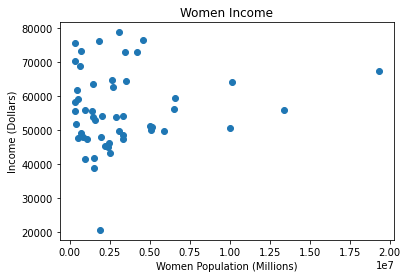

In [40]:
plt.scatter(us_census.WomenPop, us_census.Income)
plt.title("Women Income")
plt.xlabel("Women Population (Millions)")
plt.ylabel("Income (Dollars)")

plt.show()

## Histograms of Races

Now, your boss wants you to make a bunch of histograms out of the race data that you have. Look at the .columns again to see what the race categories are.

In [41]:
print(us_census.columns)

Index(['State', 'TotalPop', 'Hispanic', 'White', 'Black', 'Native', 'Asian',
       'Pacific', 'Income', 'GenderPop', 'MenPop', 'WomenPop'],
      dtype='object')


Try to make a histogram for each one!

You will have to get the columns into numerical format, and those percentage signs will have to go.

Don’t forget to fill the nan values with something that makes sense! You probably dropped the duplicate rows when making your last graph, but it couldn’t hurt to check for duplicates again.

In [42]:
races_names = ["Hispanic", "White", "Black", "Native", "Asian", "Pacific"]
races = us_census[races_names]

#Removing the '%' from the columns of races:
for column in races.columns:
  races[column] = pd.to_numeric(races[column].str[:-1])

print(races.head())
print(races.dtypes)
print(races.isna().sum())

    Hispanic      White      Black    Native     Asian   Pacific
0  13.356667  74.325417   5.682917  0.346250  3.247500  0.035833
1   5.056685  62.888736  28.750916  0.292399  1.249176  0.046978
2   3.239640  82.500901   1.423874  9.417568  1.019369  0.041892
3   4.720027  73.490088  18.283817  0.226635  1.407283  0.043156
4  38.046738  44.687909  11.650048  0.261144  3.669696  0.068816
Hispanic    float64
White       float64
Black       float64
Native      float64
Asian       float64
Pacific     float64
dtype: object
Hispanic    0
White       0
Black       0
Native      0
Asian       0
Pacific     4
dtype: int64


<ipython-input-42-bbca13369137>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  races[column] = pd.to_numeric(races[column].str[:-1])


In [16]:
#Filling in the missing values:
races = races.fillna(value = {
    "Pacific": 100 - races.Hispanic - races.White - races.Black - races.Native - races.Asian
})

print(races.head())
print(races.duplicated().sum())

    Hispanic      White      Black    Native     Asian   Pacific
0  13.356667  74.325417   5.682917  0.346250  3.247500  0.035833
1   5.056685  62.888736  28.750916  0.292399  1.249176  0.046978
2   3.239640  82.500901   1.423874  9.417568  1.019369  0.041892
3   4.720027  73.490088  18.283817  0.226635  1.407283  0.043156
4  38.046738  44.687909  11.650048  0.261144  3.669696  0.068816
0


## Histograms:

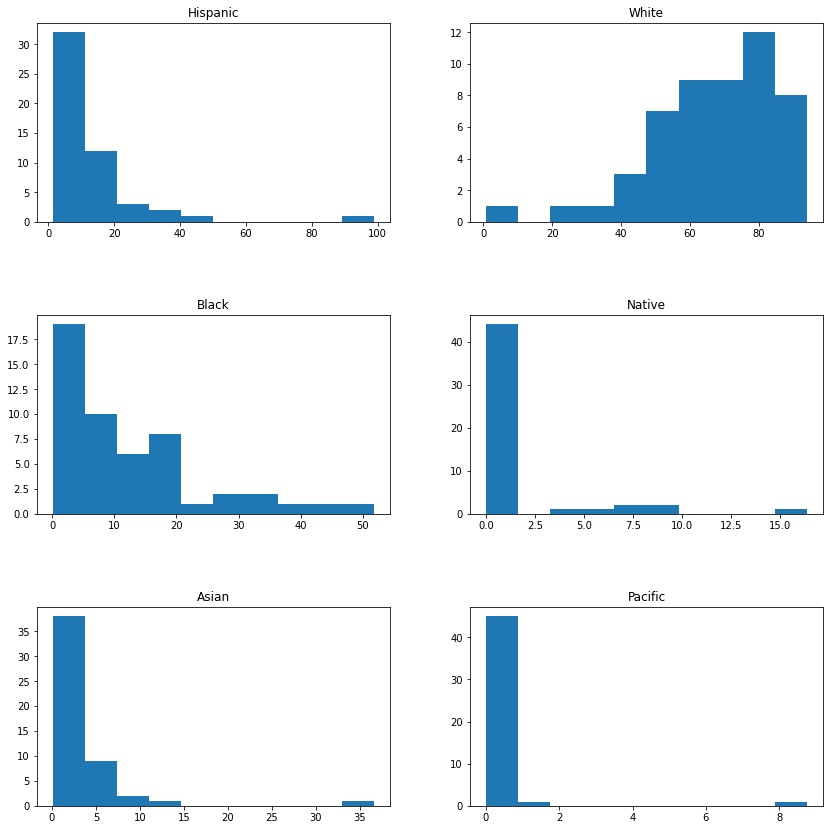

In [47]:
plt.figure(figsize = [13, 13])
for index, race in enumerate(races.columns):
  ax = plt.subplot(3, 2, index + 1)
  plt.hist(races[race])
  plt.title(race)

plt.tight_layout(pad = 6)
plt.show()

## Pie Chart:

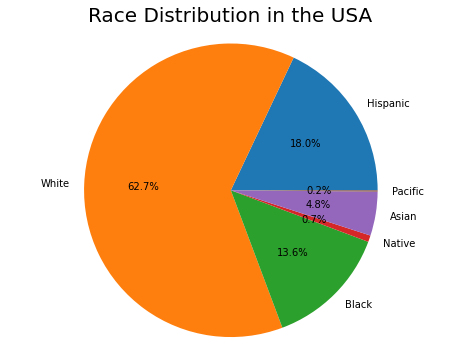

In [49]:
races["TotalPop"] = us_census.TotalPop
for race in races.columns[:-1]:
  races[f"{race}_pop"] = (races.TotalPop * races[race] / 100).round()

sum_of_races = [races[f"{race}_pop"].sum() for race in races if race in races_names]
plt.figure(figsize = (8, 6))
plt.pie(
  sum_of_races,
  autopct = "%.1f%%",
  labels = races_names
)
plt.axis("equal")
plt.title("Race Distribution in the USA", fontsize = 20)
plt.show()